In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_json("../data/dump.json")

In [3]:
data.shape

(7949, 19)

In [4]:
data.head()

,action,change_size,flags,geo_ip,hashtags,is_anon,is_bot,is_minor,is_new,is_unpatrolled,mentions,ns,page_title,parent_rev_id,rev_id,summary,timestamp,url,user
0,edit,377.0,None,NaN,[],False,False,False,False,False,[],Talk,Talk:Bajadasaurus,883357329.0,883356516.0,/* Images */,2019-02-14 22:43:57.810307,https://en.wikipedia.org/w/index.php?diff=8833...,FunkMonk
1,edit,-66.0,None,NaN,[],False,False,False,False,False,[],Main,The King of Fighters: Maximum Impact,883357327.0,883220913.0,None,2019-02-14 22:43:58.168588,https://en.wikipedia.org/w/index.php?diff=8833...,Benjaminkirsc
2,edit,-4635.0,B,NaN,[],False,True,False,False,False,[],User,User:AlexNewArtBot/WomensHistorySearchResult,883357322.0,883032645.0,"most recent results, added 113, removed 145, t...",2019-02-14 22:43:58.324169,https://en.wikipedia.org/w/index.php?diff=8833...,InceptionBot
3,edit,1.0,None,NaN,[],False,False,False,False,False,[],Template,Template:Samoa-party-stub,883357331.0,398617982.0,None,2019-02-14 22:43:58.613009,https://en.wikipedia.org/w/index.php?diff=8833...,HapHaxion
4,edit,37.0,None,NaN,[],False,False,False,False,False,[],Main,Persela Lamongan,883357330.0,883030131.0,None,2019-02-14 22:43:58.668958,https://en.wikipedia.org/w/index.php?diff=8833...,Afria Nuswantara


In [5]:
data.tail()

,action,change_size,flags,geo_ip,hashtags,is_anon,is_bot,is_minor,is_new,is_unpatrolled,mentions,ns,page_title,parent_rev_id,rev_id,summary,timestamp,url,user
7944,edit,-6.0,None,NaN,[],False,False,False,False,False,[],Template,Template:New Jersey State Senators,883364554.0,880713885.0,None,2019-02-14 23:43:53.182064,https://en.wikipedia.org/w/index.php?diff=8833...,Muboshgu
7945,edit,77.0,M,NaN,[],False,False,True,False,False,[],Main,Paulo Gazzaniga,883364555.0,882837596.0,None,2019-02-14 23:43:55.498175,https://en.wikipedia.org/w/index.php?diff=8833...,Car rush 1
7946,edit,30.0,N,NaN,[],False,False,False,True,False,[],Main,Inun-onan,NaN,883364557.0,[[WP:AES|←]]Redirected page to [[Paksiw#Inun-u...,2019-02-14 23:43:55.966439,https://en.wikipedia.org/w/index.php?oldid=883...,Obsidian Soul
7947,edit,-1.0,None,"{'city': 'Miami', 'country_name': 'United Stat...",[],True,False,False,False,False,[],Main,W. A. Martin,883364556.0,803817668.0,None,2019-02-14 23:43:56.318894,https://en.wikipedia.org/w/index.php?diff=8833...,2601:586:4104:6907:1E1:4F96:64E6:D917
7948,edit,7.0,MB,NaN,[],False,True,True,False,False,[],Main,Bruce Mayrock,883364558.0,878429616.0,Bot: Fixing double redirect to [[Nigerian Civi...,2019-02-14 23:43:57.136671,https://en.wikipedia.org/w/index.php?diff=8833...,EmausBot


In [6]:
print("Starting timestamp", data.timestamp.min())
print("Ending timestamp", data.timestamp.max())

Starting timestamp 2019-02-14 22:43:57.810307
Ending timestamp 2019-02-14 23:43:57.136671


In [7]:
data.is_anon.value_counts()

False    6636
True     1313
Name: is_anon, dtype: int64

In [8]:
data.is_bot.value_counts()

False    6937
True     1012
Name: is_bot, dtype: int64

In [9]:
data.is_minor.value_counts()

False    6726
True     1223
Name: is_minor, dtype: int64

In [10]:
data.is_new.value_counts()

False    7357
True      592
Name: is_new, dtype: int64

In [11]:
# should be equivalent to is_anon flag - yes!
registered_users = data[data.geo_ip.isnull()]
unregistered_users = data[~data.geo_ip.isnull()]
print("Proportion of changes by unregistered users", (unregistered_users.shape[0] / data.shape[0]))

Proportion of changes by unregistered users 0.16517800981255504


In [12]:
data.action.value_counts()

edit            7008
hit              341
create           145
delete           114
move              90
block             68
thank             56
patrol            43
reviewed          40
approve            9
upload             7
delete_redir       5
move_redir         5
protect            4
byemail            3
restore            2
autopromote        1
move_stable        1
merge              1
move_prot          1
overwrite          1
revision           1
unreviewed         1
unblock            1
tag                1
Name: action, dtype: int64

In [13]:
data[data.is_anon == False].groupby("user")["action"].agg("count")

user
1102techadapt            1
11JORN                   2
11S117                   2
13.78AM                  1
1SupaDupaFly1            5
21.colinthompson        10
2pou                     2
303Gent720               1
331dot                   2
456wert                  2
47thPennVols             9
4LiC3.Nn                 1
4TheWynne                1
5 albert square          2
7&6=thirteen             3
A D Monroe III           1
A loose noose            2
A.S. Brown               5
A7V2                     1
AbidingTruth             3
Abraham nomura           4
Abram.jc                 4
Absolutelypuremilk       1
Acebot                   1
Achen353                 1
ActivBowser9177          2
Acwilson9                6
Ad Orientem              6
Adam98764                2
Adamski-uk               1
                        ..
Yeedude                  4
Yeeted Or Yote           2
Yilloslime               1
Yimingbao                2
Yiosie2356               3
Yoninah                

In [14]:
data[data.is_bot == True].action.value_counts()

edit    1012
Name: action, dtype: int64

In [15]:
data.ns.value_counts()

Main              4975
Special            941
Talk               696
User               532
User talk          264
Project            242
Template            91
Draft               88
Category            45
Project talk        41
Template talk        9
Portal               7
Help talk            3
File                 3
Category talk        2
Module               2
Help                 2
MediaWiki            2
MediaWiki talk       1
Draft talk           1
Portal talk          1
Module talk          1
Name: ns, dtype: int64

In [16]:
data[data.is_bot == True].summary

2       most recent results, added 113, removed 145, t...
9       Add {{[[Template:reflist-talk|reflist-talk]]}}...
10      Redirecting to [[:Talk:1968–69 Brentford F.C. ...
18      Bot: Fixing double redirect to [[1863–1875 cho...
21      Rescuing 2 sources and tagging 0 as dead. #IAB...
28      Redirecting to [[:Talk:1973–74 Clydebank F.C. ...
31      Alter: isbn. Add: citeseerx. Removed parameter...
33      Bot: Fixing double redirect to [[1863–1875 cho...
42      Redirecting to [[:Talk:1965–66 Heart of Midlot...
43      Alter: title. | You can [[WP:UCB|use this bot]...
47                                    most recent scoring
50      most recent results, added 51, removed 64, tot...
51                                                   None
56      Bot: Fixing double redirect to [[Talk:1881–189...
60      Redirecting to [[:Talk:1964–65 Hibernian F.C. ...
71      Add {{[[Template:reflist-talk|reflist-talk]]}}...
76      most recent results, added 5, removed 6, total 43
77            

In [17]:
data.page_title.value_counts()

Special:Log/abusefilter                                      341
Special:Log/newusers                                         148
Special:Log/delete                                           118
Special:Log/move                                              95
User:PauPau2019/sandbox                                       72
Special:Log/block                                             69
Special:Log/thanks                                            56
Special:Log/pagetriage-curation                               44
Special:Log/patrol                                            43
Alexis Ohanian                                                24
User:NatureBoyMD/sandbox                                      20
Wikipedia talk:Naming conventions (Macedonia)/2019 RFC        18
Talk:The Singing Nun                                          18
Sam Humphrey                                                  16
Miles Graye                                                   16
User:Hungrydog55/sandbox/

In [18]:
data[data.user.apply(lambda name: 'bot' in name.lower())].is_bot.value_counts()

True     1008
False      68
Name: is_bot, dtype: int64

In [19]:
data[data.user.apply(lambda name: 'bot' in name.lower())]

,action,change_size,flags,geo_ip,hashtags,is_anon,is_bot,is_minor,is_new,is_unpatrolled,mentions,ns,page_title,parent_rev_id,rev_id,summary,timestamp,url,user
2,edit,-4635.0,B,NaN,[],False,True,False,False,False,[],User,User:AlexNewArtBot/WomensHistorySearchResult,883357322.0,883032645.0,"most recent results, added 113, removed 145, t...",2019-02-14 22:43:58.324169000,https://en.wikipedia.org/w/index.php?diff=8833...,InceptionBot
9,edit,18.0,B,NaN,[],False,True,False,False,False,[],Talk,Talk:Congregation of Divine Providence,883357336.0,579590067.0,Add {{[[Template:reflist-talk|reflist-talk]]}}...,2019-02-14 22:44:00.267260000,https://en.wikipedia.org/w/index.php?diff=8833...,GreenC bot
10,edit,211.0,NB,NaN,[],False,True,False,True,False,[Errors?],Talk,Talk:1968-69 Brentford F.C. season,NaN,883357335.0,Redirecting to [[:Talk:1968–69 Brentford F.C. ...,2019-02-14 22:44:00.267293000,https://en.wikipedia.org/w/index.php?oldid=883...,AnomieBOT
18,edit,2.0,MB,NaN,[],False,True,True,False,False,[],Main,Fourth cholera pandemic (1863-75),883357341.0,780890217.0,Bot: Fixing double redirect to [[1863–1875 cho...,2019-02-14 22:44:04.370673000,https://en.wikipedia.org/w/index.php?diff=8833...,EmausBot
21,edit,44.0,B,NaN,[IABot],False,True,False,False,False,[],Main,Grand River land dispute,883357345.0,879844094.0,Rescuing 2 sources and tagging 0 as dead. #IAB...,2019-02-14 22:44:06.635736000,https://en.wikipedia.org/w/index.php?diff=8833...,InternetArchiveBot
28,edit,211.0,NB,NaN,[],False,True,False,True,False,[Errors?],Talk,Talk:1973-74 Clydebank F.C. season,NaN,883357350.0,Redirecting to [[:Talk:1973–74 Clydebank F.C. ...,2019-02-14 22:44:10.511275999,https://en.wikipedia.org/w/index.php?oldid=883...,AnomieBOT
31,edit,2.0,MB,NaN,[],False,True,True,False,False,[],Main,NAIBER,883357352.0,837436663.0,Alter: isbn. Add: citeseerx. Removed parameter...,2019-02-14 22:44:12.981199000,https://en.wikipedia.org/w/index.php?diff=8833...,Citation bot
33,edit,2.0,MB,NaN,[],False,True,True,False,False,[],Main,Fourth cholera pandemic,883357353.0,704334772.0,Bot: Fixing double redirect to [[1863–1875 cho...,2019-02-14 22:44:15.819302000,https://en.wikipedia.org/w/index.php?diff=8833...,EmausBot
42,edit,241.0,NB,NaN,[],False,True,False,True,False,[Errors?],Talk,Talk:1965-66 Heart of Midlothian F.C. season,NaN,883357363.0,Redirecting to [[:Talk:1965–66 Heart of Midlot...,2019-02-14 22:44:20.153453000,https://en.wikipedia.org/w/index.php?oldid=883...,AnomieBOT
43,edit,1.0,MB,NaN,[],False,True,True,False,False,[],Main,Sh2-279,883357364.0,880055719.0,Alter: title. | You can [[WP:UCB|use this bot]...,2019-02-14 22:44:20.179989000,https://en.wikipedia.org/w/index.php?diff=8833...,Citation bot


In [20]:
data.head()

,action,change_size,flags,geo_ip,hashtags,is_anon,is_bot,is_minor,is_new,is_unpatrolled,mentions,ns,page_title,parent_rev_id,rev_id,summary,timestamp,url,user
0,edit,377.0,None,NaN,[],False,False,False,False,False,[],Talk,Talk:Bajadasaurus,883357329.0,883356516.0,/* Images */,2019-02-14 22:43:57.810307,https://en.wikipedia.org/w/index.php?diff=8833...,FunkMonk
1,edit,-66.0,None,NaN,[],False,False,False,False,False,[],Main,The King of Fighters: Maximum Impact,883357327.0,883220913.0,None,2019-02-14 22:43:58.168588,https://en.wikipedia.org/w/index.php?diff=8833...,Benjaminkirsc
2,edit,-4635.0,B,NaN,[],False,True,False,False,False,[],User,User:AlexNewArtBot/WomensHistorySearchResult,883357322.0,883032645.0,"most recent results, added 113, removed 145, t...",2019-02-14 22:43:58.324169,https://en.wikipedia.org/w/index.php?diff=8833...,InceptionBot
3,edit,1.0,None,NaN,[],False,False,False,False,False,[],Template,Template:Samoa-party-stub,883357331.0,398617982.0,None,2019-02-14 22:43:58.613009,https://en.wikipedia.org/w/index.php?diff=8833...,HapHaxion
4,edit,37.0,None,NaN,[],False,False,False,False,False,[],Main,Persela Lamongan,883357330.0,883030131.0,None,2019-02-14 22:43:58.668958,https://en.wikipedia.org/w/index.php?diff=8833...,Afria Nuswantara


In [21]:
def find_reversions(summary):
    
    is_reversion = False
    try:
        is_reversion = True if 'revert' in summary.lower() else False
    except AttributeError:
        pass
    
    return is_reversion
        

reverted_pages = data[data.summary.apply(lambda summary: find_reversions(summary))]

In [22]:
data.iloc[0].url

'https://en.wikipedia.org/w/index.php?diff=883357329&oldid=883356516'

In [23]:
data.groupby("page_title").agg("count").sort_values("action", ascending=False)

,action,change_size,flags,geo_ip,hashtags,is_anon,is_bot,is_minor,is_new,is_unpatrolled,mentions,ns,parent_rev_id,rev_id,summary,timestamp,url,user
page_title,,,,,,,,,,,,,,,,,,
Special:Log/abusefilter,341,0,0,260,341,341,341,341,341,341,341,341,0,0,341,341,0,341
Special:Log/newusers,148,0,0,0,148,148,148,148,148,148,148,148,0,0,148,148,0,148
Special:Log/delete,118,0,0,0,118,118,118,118,118,118,118,118,0,0,118,118,0,118
Special:Log/move,95,0,0,0,95,95,95,95,95,95,95,95,0,0,95,95,0,95
User:PauPau2019/sandbox,72,72,0,1,72,72,72,72,72,72,72,72,72,72,72,72,72,72
Special:Log/block,69,0,0,0,69,69,69,69,69,69,69,69,0,0,69,69,0,69
Special:Log/thanks,56,0,0,0,56,56,56,56,56,56,56,56,0,0,56,56,0,56
Special:Log/pagetriage-curation,44,0,0,0,44,44,44,44,44,44,44,44,0,0,44,44,0,44
Special:Log/patrol,43,0,0,0,43,43,43,43,43,43,43,43,0,0,43,43,0,43


In [24]:
reverted_pages.groupby("page_title").agg("count").sort_values("action", ascending=False)

,action,change_size,flags,geo_ip,hashtags,is_anon,is_bot,is_minor,is_new,is_unpatrolled,mentions,ns,parent_rev_id,rev_id,summary,timestamp,url,user
page_title,,,,,,,,,,,,,,,,,,
Talk:Elliott Abrams,3,3,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3
ZooTampa at Lowry Park,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Curiosity (rover),2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Ancient Roman bathing,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
User talk:Softlavender,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Markieff Morris,2,2,1,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Flag of Northern Ireland,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Oru Adaar Love,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"Say My Name (David Guetta, Bebe Rexha and J Balvin song)",1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [25]:
data[data.page_title == "ZooTampa at Lowry Park"].iloc[0].url

'https://en.wikipedia.org/w/index.php?diff=883358597&oldid=880568453'

In [26]:
data[data.page_title == "ZooTampa at Lowry Park"].iloc[1].url

'https://en.wikipedia.org/w/index.php?diff=883358640&oldid=883358597'

In [27]:
data[data.page_title == "Alexis Ohanian"].sort_values("timestamp")

,action,change_size,flags,geo_ip,hashtags,is_anon,is_bot,is_minor,is_new,is_unpatrolled,mentions,ns,page_title,parent_rev_id,rev_id,summary,timestamp,url,user
2157,edit,1.0,None,NaN,[],False,False,False,False,False,[],Main,Alexis Ohanian,883359321.0,883319228.0,Reverted [[WP:AGF|good faith]] edits by [[Spec...,2019-02-14 22:59:37.067958,https://en.wikipedia.org/w/index.php?diff=8833...,Esprit15d
2289,edit,77.0,None,NaN,[],False,False,False,False,False,[],Main,Alexis Ohanian,883359445.0,883359321.0,Adding local [[Wikipedia:Short description|sho...,2019-02-14 23:00:30.606971,https://en.wikipedia.org/w/index.php?diff=8833...,Esprit15d
2364,edit,-9.0,None,NaN,[],False,False,False,False,False,[],Main,Alexis Ohanian,883359516.0,883359445.0,[[WP:ETHNICITY]],2019-02-14 23:00:59.812932,https://en.wikipedia.org/w/index.php?diff=8833...,Esprit15d
2683,edit,-27.0,None,NaN,[],False,False,False,False,False,[],Main,Alexis Ohanian,883359814.0,883359516.0,"/* Early life */ ce, references go after punct...",2019-02-14 23:03:35.055986,https://en.wikipedia.org/w/index.php?diff=8833...,Esprit15d
2758,edit,4.0,None,NaN,[],False,False,False,False,False,[],Main,Alexis Ohanian,883359884.0,883359814.0,/* Early life */ ce,2019-02-14 23:04:11.200288,https://en.wikipedia.org/w/index.php?diff=8833...,Esprit15d
2815,edit,-2.0,None,NaN,[],False,False,False,False,False,[],Main,Alexis Ohanian,883359936.0,883359884.0,/* Career */ rm misusded commas,2019-02-14 23:04:45.511699,https://en.wikipedia.org/w/index.php?diff=8833...,Esprit15d
2934,edit,17.0,None,NaN,[],False,False,False,False,False,[],Main,Alexis Ohanian,883360033.0,883359936.0,/* Career */ when? tag,2019-02-14 23:05:42.449080,https://en.wikipedia.org/w/index.php?diff=8833...,Esprit15d
3059,edit,-1.0,None,NaN,[],False,False,False,False,False,[],Main,Alexis Ohanian,883360144.0,883360033.0,"/* Career */ improper comma usage, moved ref t...",2019-02-14 23:06:45.595575,https://en.wikipedia.org/w/index.php?diff=8833...,Esprit15d
3162,edit,-1.0,None,NaN,[],False,False,False,False,False,[],Main,Alexis Ohanian,883360240.0,883360144.0,/* Career */ ce,2019-02-14 23:07:32.791138,https://en.wikipedia.org/w/index.php?diff=8833...,Esprit15d
3473,edit,9.0,None,NaN,[],False,False,False,False,False,[],Main,Alexis Ohanian,883360533.0,883360240.0,"/* Victoria Taylor firing */ ce, who tag (beca...",2019-02-14 23:09:54.363343,https://en.wikipedia.org/w/index.php?diff=8833...,Esprit15d


In [28]:
data[data.page_title == "Alexis Ohanian"].sort_values("timestamp").iloc[0].url

'https://en.wikipedia.org/w/index.php?diff=883359321&oldid=883319228'

In [29]:
data.summary

0                                            /* Images */
1                                                    None
2       most recent results, added 113, removed 145, t...
3                                                    None
4                                                    None
5                                         /* Passenger */
6                                      /* Bibliography */
7                                        /* Boundaries */
8                                      /* History text */
9       Add {{[[Template:reflist-talk|reflist-talk]]}}...
10      Redirecting to [[:Talk:1968–69 Brentford F.C. ...
11                                         /* Ancestry */
12                           /* References */ {{reflist}}
13                                                   None
14      143.254.206.247 triggered [[Special:AbuseFilte...
15      143.254.206.247 triggered [[Special:AbuseFilte...
16                                         /* Language */
17            

In [30]:
data[data.page_title == "ZooTampa at Lowry Park"]

,action,change_size,flags,geo_ip,hashtags,is_anon,is_bot,is_minor,is_new,is_unpatrolled,mentions,ns,page_title,parent_rev_id,rev_id,summary,timestamp,url,user
1369,edit,8.0,None,"{'city': 'Longwood', 'country_name': 'United S...",[],True,False,False,False,False,[],Main,ZooTampa at Lowry Park,883358597.0,880568453.0,/* Asian Gardens */,2019-02-14 22:54:11.420583,https://en.wikipedia.org/w/index.php?diff=8833...,142.196.214.68
1418,edit,-8.0,M,NaN,[],False,False,True,False,False,[],Main,ZooTampa at Lowry Park,883358640.0,883358597.0,Reverted edits by [[Special:Contributions/142....,2019-02-14 22:54:27.395140,https://en.wikipedia.org/w/index.php?diff=8833...,Agent00x
1528,edit,13.0,None,"{'city': 'Longwood', 'country_name': 'United S...",[],True,False,False,False,False,[],Main,ZooTampa at Lowry Park,883358734.0,883358640.0,/* Asian Gardens */,2019-02-14 22:55:07.127529,https://en.wikipedia.org/w/index.php?diff=8833...,142.196.214.68
1623,edit,-13.0,M,NaN,[],False,False,True,False,False,[],Main,ZooTampa at Lowry Park,883358818.0,883358734.0,Reverted edits by [[Special:Contributions/142....,2019-02-14 22:55:40.308016,https://en.wikipedia.org/w/index.php?diff=8833...,I dream of horses


In [31]:
data[data.is_anon == False].user.value_counts()

AnomieBOT             349
TAnthony              337
Citation bot          231
InternetArchiveBot    144
AssociateAffiliate    106
I dream of horses      94
Pythoncoder            91
RHaworth               73
PauPau2019             71
EmausBot               67
Dl2000                 64
Seby1541               64
GrahamHardy            60
Level C                51
Esprit15d              51
ProcseeBot             50
Legacypac              49
The-                   41
Jweiss11               40
Doc James              37
Davidgoodheart         35
GreenC bot             35
Jmertel23              34
Filedelinkerbot        32
Agent00x               32
Redalert2fan           31
GoingBatty             30
Joeykai                29
BD2412                 27
Kwamikagami            26
                     ... 
KBH96                   1
Mihai.zamfir30          1
Horseradishy            1
Jeangagnon              1
Cinderella157           1
Perry2121               1
Edgar13298              1
SusunW      

In [32]:
anon = data[data.is_anon == True]

In [33]:
anon.iloc[0].geo_ip

{'city': 'San Jose',
 'country_name': 'United States',
 'latitude': 37.2972,
 'longitude': -121.8868,
 'region_name': 'California'}

In [34]:
# ast.literal_eval(str(anon.iloc[0].geo_ip))

In [35]:
import ast
from pandas.io.json import json_normalize

def only_dict(d):
    '''
    Convert json string representation of dictionary to a python dict
    '''
    return ast.literal_eval(str(d))

# json_normalize(anon['geo_ip'].apply(only_dict))
json_normalize(anon['geo_ip'].apply(only_dict).tolist())

,city,country_name,latitude,longitude,region_name
0,San Jose,United States,37.2972,-121.8868,California
1,San Jose,United States,37.2972,-121.8868,California
2,Makati City,Philippines,14.5501,121.0360,National Capital Region
3,None,Philippines,14.5955,120.9721,None
4,Williamstown,United States,43.4275,-75.9090,New York
5,Los Angeles,United States,34.0438,-118.1874,California
6,Johannesburg,South Africa,-26.2052,28.0498,Gauteng
7,Fairfax,United States,38.8209,-77.2891,Virginia
8,New York,United States,40.7143,-74.0060,New York
9,Las Vegas,United States,36.1443,-115.2794,Nevada


In [36]:
json_normalize(anon['geo_ip'].apply(only_dict).tolist())["country_name"].value_counts()

United States             768
United Kingdom            149
Canada                     72
Australia                  34
Ukraine                    27
Chile                      22
New Zealand                18
Spain                      17
Germany                    16
Indonesia                  16
Brazil                     16
Philippines                13
Greece                     11
Ireland                    11
Italy                      10
Hong Kong                  10
Serbia                      8
India                       8
Netherlands                 5
France                      5
Sweden                      4
Romania                     4
Albania                     4
Mexico                      3
Belgium                     3
Poland                      3
Denmark                     3
Bosnia and Herzegovina      3
Peru                        2
Argentina                   2
Gambia                      2
Republic of Korea           2
Japan                       2
Russia    

In [37]:
anon['geo_ip']

14      {'city': 'San Jose', 'country_name': 'United S...
15      {'city': 'San Jose', 'country_name': 'United S...
17      {'city': 'Makati City', 'country_name': 'Phili...
20      {'city': None, 'country_name': 'Philippines', ...
22      {'city': 'Williamstown', 'country_name': 'Unit...
23      {'city': 'Los Angeles', 'country_name': 'Unite...
41      {'city': 'Johannesburg', 'country_name': 'Sout...
45      {'city': 'Fairfax', 'country_name': 'United St...
48      {'city': 'New York', 'country_name': 'United S...
49      {'city': 'Las Vegas', 'country_name': 'United ...
62      {'city': None, 'country_name': 'United States'...
64      {'city': 'Belgrade', 'country_name': 'Serbia',...
89      {'city': None, 'country_name': 'United States'...
93      {'city': 'Izunokuni', 'country_name': 'Japan',...
103     {'city': 'Mooresville', 'country_name': 'Unite...
116     {'city': None, 'country_name': 'United States'...
119     {'city': 'New York', 'country_name': 'United S...
124           

In [38]:
data.iloc[10].summary

'Redirecting to [[:Talk:1968–69 Brentford F.C. season]] because titles with en-dashes are hard to type.  Errors? [[User:AnomieBOT/shutoff/EnDashRedirectCreator]]'

In [39]:
data.shape

(7949, 19)

In [40]:
data.url.nunique()

7008

In [41]:
anon.groupby("page_title").agg("count").sort_values("action", ascending=False)

,action,change_size,flags,geo_ip,hashtags,is_anon,is_bot,is_minor,is_new,is_unpatrolled,mentions,ns,parent_rev_id,rev_id,summary,timestamp,url,user
page_title,,,,,,,,,,,,,,,,,,
Special:Log/abusefilter,260,0,0,260,260,260,260,260,260,260,260,260,0,0,260,260,0,260
Distinguished Service Medal (United States Navy),15,15,0,15,15,15,15,15,15,15,15,15,15,15,0,15,15,15
West Michigan Ironmen,14,14,0,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Dumbo (2019 film),11,11,0,11,11,11,11,11,11,11,11,11,11,11,1,11,11,11
List of Monster characters,10,10,0,10,10,10,10,10,10,10,10,10,10,10,9,10,10,10
Sam Humphrey,10,10,0,10,10,10,10,10,10,10,10,10,10,10,5,10,10,10
Die Kitty Die,10,10,0,10,10,10,10,10,10,10,10,10,10,10,3,10,10,10
FIS Alpine World Ski Championships 2019 – Men's giant slalom,8,8,0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Hunted (2015 TV series),7,7,0,7,7,7,7,7,7,7,7,7,7,7,6,7,7,7


In [42]:
anon[anon.page_title == "Distinguished Service Medal (United States Navy)"]

,action,change_size,flags,geo_ip,hashtags,is_anon,is_bot,is_minor,is_new,is_unpatrolled,mentions,ns,page_title,parent_rev_id,rev_id,summary,timestamp,url,user
3415,edit,21.0,None,"{'city': 'Kaneohe', 'country_name': 'United St...",[],True,False,False,False,False,[],Main,Distinguished Service Medal (United States Navy),883360478.0,883334324.0,None,2019-02-14 23:09:31.018260,https://en.wikipedia.org/w/index.php?diff=8833...,66.91.64.113
3759,edit,34.0,None,"{'city': 'Kaneohe', 'country_name': 'United St...",[],True,False,False,False,False,[],Main,Distinguished Service Medal (United States Navy),883360801.0,883360478.0,None,2019-02-14 23:12:17.321381,https://en.wikipedia.org/w/index.php?diff=8833...,66.91.64.113
3981,edit,23.0,None,"{'city': 'Kaneohe', 'country_name': 'United St...",[],True,False,False,False,False,[],Main,Distinguished Service Medal (United States Navy),883361004.0,883360801.0,None,2019-02-14 23:13:50.715726,https://en.wikipedia.org/w/index.php?diff=8833...,66.91.64.113
4179,edit,35.0,None,"{'city': 'Kaneohe', 'country_name': 'United St...",[],True,False,False,False,False,[],Main,Distinguished Service Medal (United States Navy),883361192.0,883361004.0,None,2019-02-14 23:15:14.522844,https://en.wikipedia.org/w/index.php?diff=8833...,66.91.64.113
4449,edit,20.0,None,"{'city': 'Kaneohe', 'country_name': 'United St...",[],True,False,False,False,False,[],Main,Distinguished Service Medal (United States Navy),883361408.0,883361192.0,None,2019-02-14 23:16:50.004045,https://en.wikipedia.org/w/index.php?diff=8833...,66.91.64.113
4840,edit,22.0,None,"{'city': 'Kaneohe', 'country_name': 'United St...",[],True,False,False,False,False,[],Main,Distinguished Service Medal (United States Navy),883361762.0,883361408.0,None,2019-02-14 23:19:38.892471,https://en.wikipedia.org/w/index.php?diff=8833...,66.91.64.113
5140,edit,38.0,None,"{'city': 'Kaneohe', 'country_name': 'United St...",[],True,False,False,False,False,[],Main,Distinguished Service Medal (United States Navy),883362038.0,883361762.0,None,2019-02-14 23:21:49.970762,https://en.wikipedia.org/w/index.php?diff=8833...,66.91.64.113
5345,edit,39.0,None,"{'city': 'Kaneohe', 'country_name': 'United St...",[],True,False,False,False,False,[],Main,Distinguished Service Medal (United States Navy),883362215.0,883362038.0,None,2019-02-14 23:23:20.496302,https://en.wikipedia.org/w/index.php?diff=8833...,66.91.64.113
5583,edit,34.0,None,"{'city': 'Kaneohe', 'country_name': 'United St...",[],True,False,False,False,False,[],Main,Distinguished Service Medal (United States Navy),883362438.0,883362215.0,None,2019-02-14 23:25:02.901488,https://en.wikipedia.org/w/index.php?diff=8833...,66.91.64.113
5810,edit,21.0,None,"{'city': 'Kaneohe', 'country_name': 'United St...",[],True,False,False,False,False,[],Main,Distinguished Service Medal (United States Navy),883362652.0,883362438.0,None,2019-02-14 23:26:57.003523,https://en.wikipedia.org/w/index.php?diff=8833...,66.91.64.113


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

FileNotFoundError: [Errno 2] No such file or directory: '/anaconda3/share/basemap/etopo1.jpg'

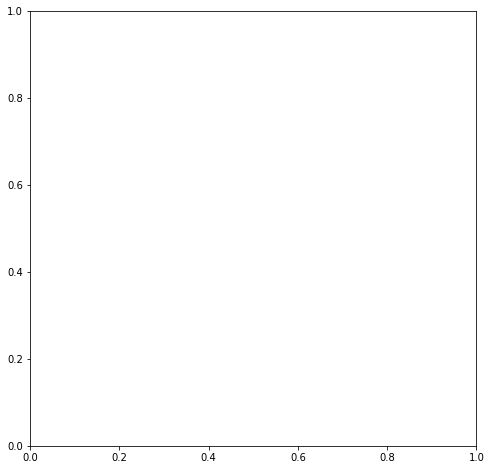

In [44]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

In [45]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

OSError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install -c conda-forge basemap-data-hires`.